In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd  /content/drive/MyDrive/Papers/superCon

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Papers/superCon


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
grad_storage = np.load('./grad_storage.npy', allow_pickle=True)
grad_percent_storage = np.load('./grad_percent_storage.npy', allow_pickle=True)
lattice_percent_storage = np.load('./lattice_percent_storage.npy', allow_pickle=True)
atomwise_grad = grad_storage.sum(axis=1)

sp_mol = np.load('./sp_mol.npy', allow_pickle=True)
sp_labels = np.load('./sp_labels.npy', allow_pickle=True)
sp_coords512 = np.load('./sp_coords512.npy', allow_pickle=True)
sp_coords = np.load('./sp_coords.npy', allow_pickle=True)
sp_lattice = np.load('./sp_lattice.npy', allow_pickle=True)

SAMPLE_NUM = len(sp_labels)
print(SAMPLE_NUM, grad_storage.shape, sp_mol.shape, sp_labels.shape, \
  sp_coords512.shape, sp_lattice.shape)

406 (94, 406) (406,) (406,) (406,) (406, 9)


In [ ]:
str_grad_storage = np.zeros(shape=(94), dtype=np.float32)
ele_count = np.zeros((94))
def find_combination(NOW_MOLECULE):
  now_per = grad_percent_storage[NOW_MOLECULE]
  now_mol = sp_mol[NOW_MOLECULE]
  atom_sort = np.argsort(now_per)
  atom_sort = atom_sort[::-1]
  now_per = now_per[atom_sort]
  now_mol = now_mol[atom_sort]

  sum = 0
  for i in range(len(now_per)):
    if sum>0.6:
      break
    else:
      str_grad_storage[now_mol[i]] += now_per[i]
      ele_count[now_mol[i]] += 1
      sum += now_per[i]

  structure_storage.append(now_mol[atom_sort[:i]])
  grad_acrate.append(sum)

In [ ]:
structure_storage = []
grad_acrate = []
for i in range(SAMPLE_NUM):
  find_combination(i)

In [ ]:
sheet = pd.DataFrame([])
sheet['mol'] = sp_mol
sheet['rate'] = [np.round(x, 2) for x in grad_percent_storage]
sheet['structure'] = structure_storage
sheet['str_grad_rate'] = np.round(grad_acrate, 2)
sheet['ex_rate'] = 0.0
sheet['type'] = -1
sheet['main_element'] = ''
for i in range(len(sheet)):
  mol_temp = sheet['mol'][i]
  sheet['ex_rate'][i] = np.round(len(sheet['structure'][i]) / len(mol_temp), 2)
  str_ele = list(dict.fromkeys(sheet['structure'][i]))
  str_ele.sort()
  sheet['main_element'][i] = str(str_ele)
  if 26 in mol_temp:
    sheet['type'][i] = 0
  elif 1 in mol_temp:
    sheet['type'][i] = 1
  elif 29 in mol_temp:
    sheet['type'][i] = 2
  
  #for ele in mol_temp:
    
sheet.to_excel('./grad_accumulate_relu.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.

In [ ]:
periodic_table = np.array([0, 'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar',
                  'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 
                  'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Te', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 
                  'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 
                  'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 
                  'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm','Md', 'No', 'Lr',
                  'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og', 'Uue'])


In [ ]:
from collections import Counter
temp = sheet['main_element'].tolist()
cnter = Counter(temp)
count_df = pd.DataFrame(cnter.items())
count_df['ele'] = ''
for i in range(len(count_df)):
  change = list(map(int, count_df[0][i][1:-1].split(',')))
  change = periodic_table[change]
  count_df['ele'][i] = change

ele = count_df['ele']
count_df.drop(labels=['ele'], axis=1, inplace = True)
count_df.insert(1, 'ele', ele)

count_df.to_excel('./strcture_count.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:

for i in range(len(atomwise_grad)):
  if str_grad_storage[i]>0:
    str_grad_storage[i] /= ele_count[i]


[67 66 81 63 40 23 47 38  7 90 11 17 53 71 25  9 55 82 58 50 52 78 31 29
 20 33 37 72 28 27 74 43 76 30  1 79 12 56 51 49 70 77 44 57 41 24 13 16
  5 19 21 80 83 26  3  8 15 75 22 39 32 60 45 69 92 73 68 46 42  6  4 14
 48 34 10  2 93 18 84 91 89 88 87 86 85 65 35 64 62 61 59 54 36  0]


<BarContainer object of 94 artists>

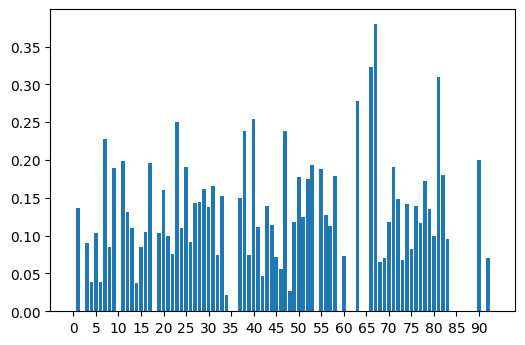

In [ ]:
sort_idx = np.argsort(str_grad_storage)
sort_idx = sort_idx[::-1]

#fig, ax = plt.subplots(dpi=250, figsize=(11, 5))
#plt.bar(atom_x, str_grad_storage[sort_idx])
print(sort_idx) #lan lan Tl lan V Ag Na

atom_x = np.arange(len(str_grad_storage))
plt.figure(0, dpi=100)
plt.xticks(np.arange(0, 93, 5))
plt.bar(atom_x, str_grad_storage)

In [ ]:
def groupout(N):
  group1 = np.array([1,3,11,19,37,55,87])
  group2 = np.array([4,12,20,38,56,88])
  group3 = np.array([21,39])
  group4 = np.array([22,40,72,104])
  group18 = np.array([2,10,18,36,54,86,118])
  if N==1:
    return group1
  if N==2:
    return group2
  if N==3:
    return group3
  if N==18:
    return group18  
  if N>=4 and N<=12:
    output = group4.copy()
    output += N-4
    return output
  else:
    output = group2.copy()
    output[0] += N-12
    output[1] += N-12
    output[2] += N-12+10
    output[3] += N-12+10
    output[4] += N-12+24
    output[5] += N-12+24
    return output


In [ ]:
def periodout(N):
  period1 = np.array([1,2])
  period2 = np.array(range(3,11))
  period3 = period2+8
  period4 = np.array(range(19,37))
  period5 = period4+18
  period6 = np.append(np.array([55,56]), np.array(range(72,86)))
  period7 = period6+32
  periodlan = np.array(range(57,72))
  perioda = np.array(range(89,104))
  period_list = [period1,period2,period3,period4,period5,period6,period7,periodlan,perioda]
  return period_list[N-1]


In [ ]:
group_median = []
period_median = []
for i in range(1,19):
  me = np.median(str_grad_storage[groupout(i)[:-1]])
  me = np.round(me, 4)
  group_median.append(me)
for i in range(1,7):
  me = np.median(str_grad_storage[periodout(i)])
  me = np.round(me, 4)
  period_median.append(me)
me = np.median(str_grad_storage[periodout(8)])
me = np.round(me, 4)
period_median.append(me)

<BarContainer object of 7 artists>

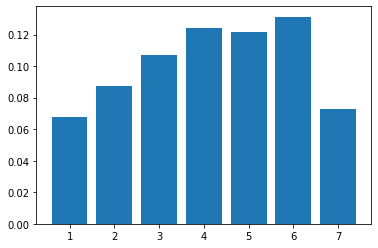

In [ ]:
plt.bar(x=range(1,8), height=period_median)

<BarContainer object of 18 artists>

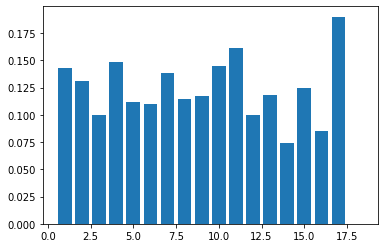

In [ ]:
plt.bar(x=range(1,19), height=group_median)

In [ ]:
group_median = []
period_median = []
for i in range(1,19):
  me = np.mean(str_grad_storage[groupout(i)[:-1]])
  me = np.round(me, 4)
  group_median.append(me)
for i in range(1,7):
  me = np.mean(str_grad_storage[periodout(i)])
  me = np.round(me, 4)
  period_median.append(me)
me = np.mean(str_grad_storage[periodout(8)])
me = np.round(me, 4)
period_median.append(me)

<BarContainer object of 7 artists>

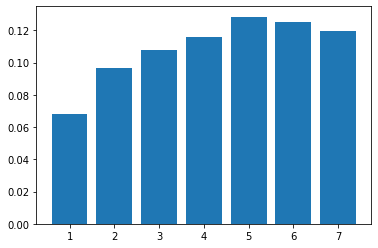

In [ ]:
plt.bar(x=range(1,8), height=period_median)

<BarContainer object of 18 artists>

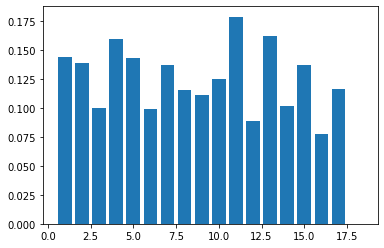

In [ ]:
plt.bar(x=range(1,19), height=group_median)

In [ ]:
sheet[sheet['type']==0].index

Int64Index([ 30,  60,  85, 127, 130, 155, 164, 167, 170, 178, 184, 205, 223,
            225, 311, 329, 336, 359, 367, 386, 391],
           dtype='int64')

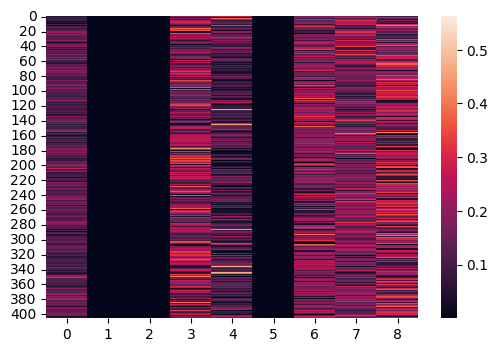

In [ ]:
plt.figure(0, dpi=100)
sns.heatmap(np.abs(lattice_percent_storage))
plt.savefig('./lattice_grad.pdf') 

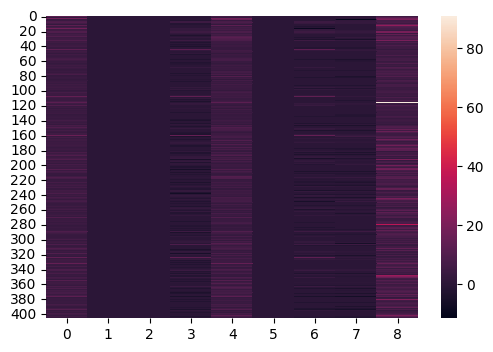

In [ ]:
plt.figure(1, dpi=100)
sns.heatmap(sp_lattice)

In [ ]:
vol_list = []
for i in range(SAMPLE_NUM):
  vol = np.array([sp_lattice[i, :3], sp_lattice[i, 3:6], sp_lattice[i, 6:9]])
  vol_list.append(np.linalg.det(vol))
vol_list = np.array(vol_list)
vol_list.shape

(406,)

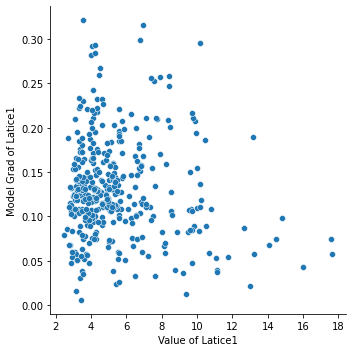

In [ ]:
sns.relplot(x=sp_lattice[:, 0], y=lattice_percent_storage[:, 0])
#plt.title('Lattice_X & Grad_Y in axis '+str(0))
plt.ylabel("Model Grad of Latice1")
plt.xlabel("Value of Latice1")   
plt.savefig('./Lattice_1 Grad.pdf')

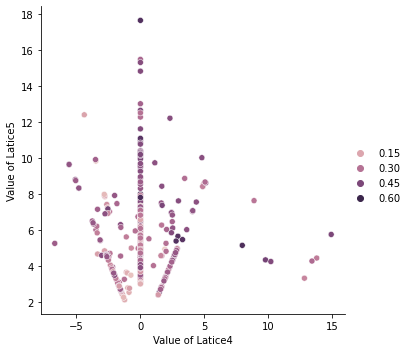

In [ ]:
sns.relplot(x=sp_lattice[:, 3], y=sp_lattice[:, 4], \
            hue=lattice_percent_storage[:, 3]+lattice_percent_storage[:, 4])
plt.ylabel("Value of Latice5")
plt.xlabel("Value of Latice4")
plt.savefig('./Lattice_45 Grad.pdf')  

In [ ]:
#!pip3 install ipympl

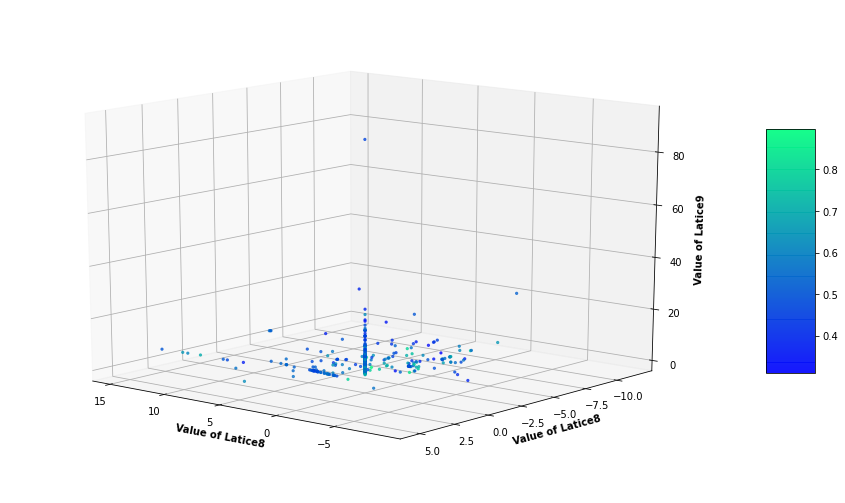

In [ ]:
x = sp_lattice[:, 6]
y = sp_lattice[:, 7]
z = sp_lattice[:, 8]

# Creating figure
fig = plt.figure(figsize=(16, 9))
#ax = Axes3D(fig)
ax = plt.axes(projection="3d")

# Add x, y gridlines 
ax.grid(b=True, c='red', 
    linestyle='-.', linewidth=0.3, 
    alpha=0.2) 

# Creating color map
my_cmap = plt.get_cmap('winter')

# Creating plot
color_grad = lattice_percent_storage[:, 6] +\
  lattice_percent_storage[:, 7]+ lattice_percent_storage[:, 8]
sctt = ax.scatter3D(x, y, z,
          alpha=0.7,
          c=color_grad, 
          cmap=my_cmap, 
          marker='o', s=5)

#plt.title("Third lattice point and grad")
ax.set_xlabel("Value of Latice8", fontweight='bold') 
ax.set_ylabel("Value of Latice8", fontweight='bold') 
ax.set_zlabel("Value of Latice9", fontweight='bold')
ax.view_init(elev=15, azim=130)
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

plt.savefig('./Lattice_789 Grad.pdf') 

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 

In [ ]:
def plot_molecule(MOLECULE):
  # Creating dataset
  mol = sp_mol[MOLECULE]
  coords = sp_coords[MOLECULE]
  z = coords[:, 2]
  x = coords[:, 0]
  y = coords[:, 1]
  
  # Creating figure
  fig = plt.figure(figsize = (16, 9))
  ax = plt.axes(projection ="3d")
  
  # Add x, y gridlines 
  ax.grid(b=True, c='red', 
      linestyle='-.', linewidth=0.3, 
      alpha=0.2) 
  
  # Creating color map
  my_cmap = plt.get_cmap('winter')
  
  # Creating plot
  sctt = ax.scatter3D(x, y, z,
            alpha=0.8,
            c=grad_percent_storage[MOLECULE], 
            cmap=my_cmap, 
            marker='o', s=400)
  
  plt.title("Molecule "+str(MOLECULE)+': '+str(mol))
  ax.set_xlabel('X-axis', fontweight='bold') 
  ax.set_ylabel('Y-axis', fontweight='bold') 
  ax.set_zlabel('Z-axis', fontweight='bold')
  fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
  

  bias = -0.01
  for i in range(len(mol)):
    ax.text(coords[i, 0]+bias, coords[i, 1]+bias, coords[i, 2]+bias, str(mol[i]))


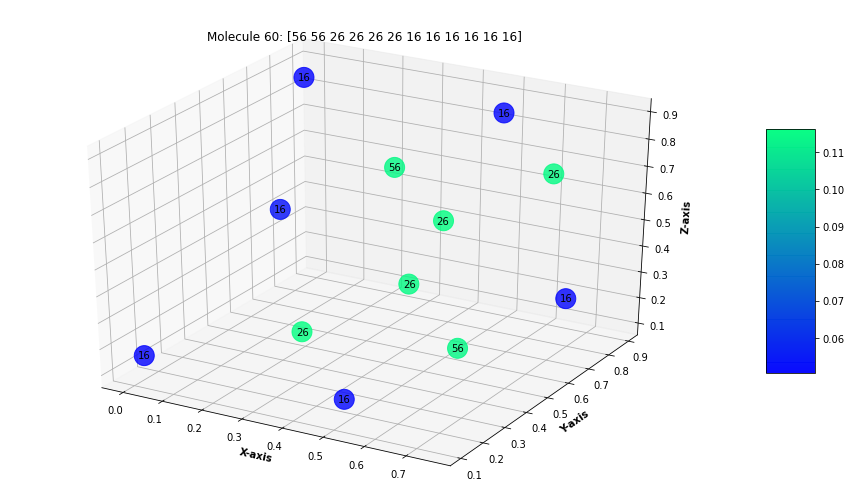

In [ ]:
plot_molecule(60)
plt.savefig('./mol_60.pdf') 

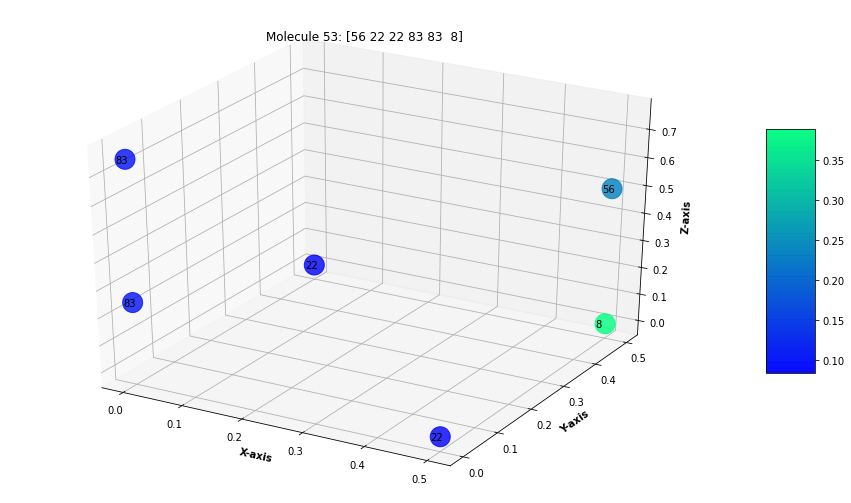

In [ ]:
plot_molecule(53)
plt.savefig('./mol_53.pdf') 

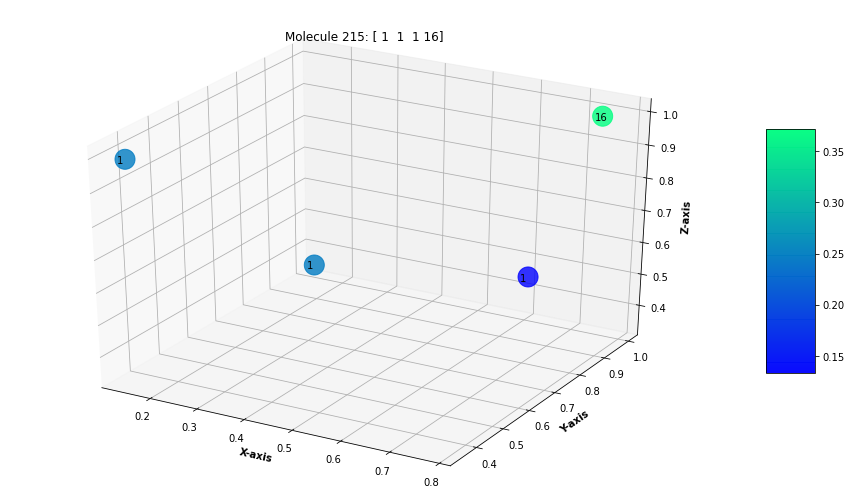

In [ ]:
plot_molecule(215)
plt.savefig('./mol_215.pdf') 

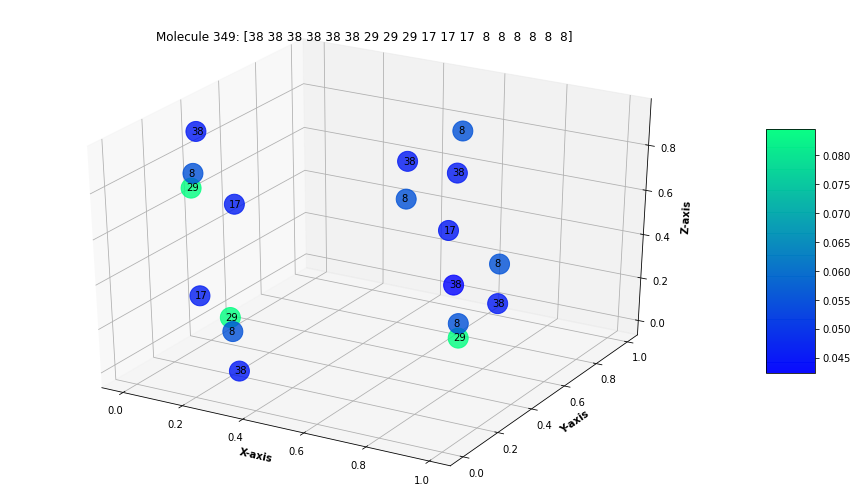

In [ ]:
plot_molecule(349)
plt.savefig('./mol_349.pdf') 